### problem statement:
in this notebook we will to exploratory data analysis on the "RESIDENTIAL ENERGY CONSUMPTION SURVEY" dataset and then we aim to predict the level of consumption.

to insure that the process of the analysis is smooth i segment the the problems into multiple tasks:

    1. reading data and meta data csv files from the official website
    2. clean data, handling messing values, handling duplicate data
    3. explore categorical columns
    3. explore numerical columns (correlation, catplots, box plots)
    4. clustering the data using Kmeans.
    5. feature selection (run an algorithm that return features with importance weight
    6. build the machine learning model to predict the target column

#### task 1: reading the data

In [1]:
import pandas as pd
import numpy as np 
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.regressor import PredictionError, ResidualsPlot


In [2]:
### we will download the csv file from the offical website

data_url = 'https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv'
layout_url = 'https://www.eia.gov/consumption/residential/data/2009/csv/public_layout.csv'
file_name = 'recs2009.csv'
layout_file_name = 'public_layout.csv'
dir_name = 'Data'

try:
    os.makedirs(dir_name, exist_ok = True)
    print("Directory '%s' created successfully" %dir_name)
except OSError as error:
    print("Directory '%s' can not be created")


req = requests.get(data_url)
url_content = req.content
csv_file = open(dir_name + '/' + file_name, 'wb')
csv_file.write(url_content)
csv_file.close()


req = requests.get(layout_url)
url_content = req.content
csv_file = open(dir_name + '/' + layout_file_name, 'wb')
csv_file.write(url_content)
csv_file.close()

Directory 'Data' created successfully


In [3]:
###reading the csv that was downloaded into the data dir using pandas.
data_loc = dir_name + '/' + file_name
layout_data_loc = dir_name + '/' + layout_file_name

### dataframe contains the actual data
main_df = pd.read_csv(data_loc)

### dataframe contains the metadata
layout_df = pd.read_csv(layout_data_loc)

c:\users\aghaz\anaconda3new\envs\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (717,718) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df = main_df.copy()

In [5]:
df_dummies = pd.get_dummies(df)
df_dummies.describe()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,IECC_Climate_Pub_2B,IECC_Climate_Pub_3A,IECC_Climate_Pub_3B-4B,IECC_Climate_Pub_3C,IECC_Climate_Pub_4A,IECC_Climate_Pub_4C,IECC_Climate_Pub_5A,IECC_Climate_Pub_5B-5C,IECC_Climate_Pub_6A-6B,IECC_Climate_Pub_7A-7B-7AK-8AK
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,...,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,6042.000000,2.628321,5.373086,14.783663,2.659604,9402.981870,4141.375238,1415.406108,4135.146983,1443.503104,...,0.017297,0.102210,0.126045,0.030456,0.223703,0.025821,0.198792,0.039394,0.080361,0.011918
std,3488.205986,1.042142,2.859366,8.195824,1.192627,5192.101419,2317.759375,1134.659475,2260.543686,1021.748722,...,0.130381,0.302936,0.331914,0.171846,0.416742,0.158609,0.399107,0.194539,0.271862,0.108520
min,1.000000,1.000000,1.000000,1.000000,1.000000,476.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3021.500000,2.000000,3.000000,8.000000,2.000000,6297.040000,2197.500000,561.000000,2224.000000,712.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6042.000000,3.000000,5.000000,15.000000,2.000000,7970.630000,4483.000000,1045.000000,4502.000000,1179.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9062.500000,3.000000,7.000000,21.000000,3.000000,11330.030000,5913.000000,1897.000000,5854.000000,1842.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12083.000000,4.000000,10.000000,27.000000,5.000000,95779.140000,12525.000000,5480.000000,13346.000000,5357.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print(f'number of rows is {df.shape[0]}')
print(f'number of columns is {df.shape[1]}')

number of rows is 12083
number of columns is 940


In [7]:
layout_df

,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
0,DOEID,Unique identifier for each respondent,1,Character,5
1,REGIONC,Census Region,2,Numeric,8
2,DIVISION,Census Division,3,Numeric,8
3,REPORTABLE_DOMAIN,Reportable states and groups of states,4,Numeric,8
4,TYPEHUQ,Type of housing unit,5,Numeric,8
...,...,...,...,...,...
935,WSF,Weather & shielding factor for the housing unit,936,Numeric,8
936,OA_LAT,Annual value for latent heat infiltration from...,937,Numeric,8
937,GWT,Annual average ground water temperature (F) fo...,938,Numeric,8
938,DesignDBT99,Dry bulb design temperature (F) expected to be...,939,Numeric,8


#### task 2: cleaning the data 

In [8]:
### investigating missing values
for col in df.columns:
    if df[col].isna().any():
        print(col)
df.isna().sum()

DOEID                0
REGIONC              0
DIVISION             0
REPORTABLE_DOMAIN    0
TYPEHUQ              0
                    ..
WSF                  0
OA_LAT               0
GWT                  0
DesignDBT99          0
DesignDBT1           0
Length: 940, dtype: int64

In [9]:
### from layout csv, there are alot of columns that have been imputed (df.fillna(0))
### let's explore those columns and see if they are worth keeping
# a list of column names that have been imputed
imput_cols = [] 
keyword = 'Imputation flag'

for i in range(len(layout_df)):
    ## from the public_layout file every imputed column name starts with "Imputation flag"
    if keyword in layout_df['Variable Label'][i]:
        imput_cols.append(layout_df['Variable Name'][i])

In [10]:
print(f'{len(imput_cols)} columns are imputed with zero')

359 columns are imputed with zero


In [11]:
### calcuate the percentage of zeros in each of the columns
### the values 
imput_dic = {}
for col in imput_cols:
      imput_dic.update({col :((sum(df[col]==0)), (sum(df[col]!=0)))})

In [12]:
### the values of the dict is a tuple where the it represents (zeros, non-zeros)
### as we can see the imputed columns are mostly consistnet of zeros so we will be dropping them
imput_dic

{'ZKOWNRENT': (12074, 9),
 'ZCONDCOOP': (12069, 14),
 'ZYEARMADE': (10281, 1802),
 'ZYEARMADERANGE': (11777, 306),
 'ZOCCUPYYRANGE': (12080, 3),
 'ZCONVERSION': (12016, 67),
 'ZORIG1FAM': (12053, 30),
 'ZLOOKLIKE': (12057, 26),
 'ZNUMFLRS': (12076, 7),
 'ZNUMAPTS': (12009, 74),
 'ZWALLTYPE': (12051, 32),
 'ZROOFTYPE': (11763, 320),
 'ZSTUDIO': (12083, 0),
 'ZNAPTFLRS': (12083, 0),
 'ZSTORIES': (12082, 1),
 'ZTYPEHUQ4': (12043, 40),
 'ZBEDROOMS': (12080, 3),
 'ZNCOMBATH': (12079, 4),
 'ZNHAFBATH': (12080, 3),
 'ZOTHROOMS': (12072, 11),
 'ZCELLAR': (12073, 10),
 'ZCRAWL': (12025, 58),
 'ZCONCRETE': (11909, 174),
 'ZBASEFIN': (12067, 16),
 'ZFINBASERMS': (12068, 15),
 'ZBASEHEAT': (12069, 14),
 'ZBASEHT2': (12076, 7),
 'ZPCTBSTHT': (12080, 3),
 'ZBASECOOL': (12061, 22),
 'ZBASECL2': (12078, 5),
 'ZPCTBSTCL': (12081, 2),
 'ZBASEUSE': (12078, 5),
 'ZATTIC': (12036, 47),
 'ZATTICFIN': (12045, 38),
 'ZFINATTRMS': (12072, 11),
 'ZATTCHEAT': (12066, 17),
 'ZATTCHT2': (12081, 2),
 'ZPCTATTHT': (

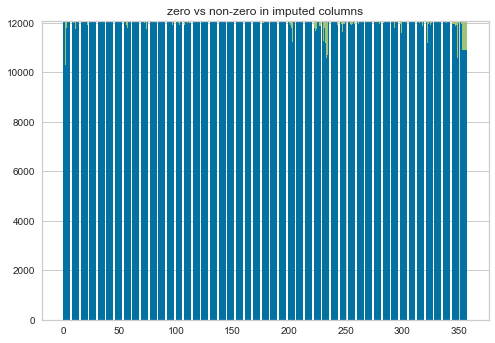

In [13]:
### plotting the dict
### the green color repreesnts the non-zero values 
c = []
v = []

for key, val in imput_dic.items():
    c.append(key)
    v.append(val)
v = np.array(v)
plt.title("zero vs non-zero in imputed columns")
plt.bar(range(len(c)), v[:,0])
plt.bar(range(len(c)), v[:,1], bottom=v[:,0])
plt.show()

In [14]:
#### droping the imputed columns
df.drop(imput_cols, axis=1, inplace = True)

In [15]:
print(f"feature count befor was 940, and now it is {df.shape[1]} after getting rid of the imputed columns")

feature count befor was 940, and now it is 581 after getting rid of the imputed columns


In [16]:
### dealing with dublicate data
print("the number of dublicate columns in the data set is ", df.duplicated().sum())

the number of dublicate columns in the data set is  0


##### in this section i aim to explore the data more to find ways to reduce the dimensionality of the dataset

In [17]:
###list of categorical columns
cat_cols = []

###list of numerical columns
num_cols = []

label_col = ['KWH']

for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)
        
    


In [18]:
print(f"the dataset contains {len(cat_cols)} categorical columns")
print(f"the dataset contains {len(num_cols)} numerical columns")

the dataset contains 5 categorical columns
the dataset contains 576 numerical columns


In [19]:
cat_cols

['METROMICRO', 'UR', 'NOCRCASH', 'NKRGALNC', 'IECC_Climate_Pub']

#### task 3: exploring the categorical cols

In [20]:
'''
categorical columns description

METROMICRO : Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area
UR : Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area
NOCRCASH : Number of kerosene 'cash and carry' purchases
NKRGALNC : Gallons per kerosene 'cash and carry' purchase
IECC_Climate_Pub : International Energy Conservation Code (IECC) climate zone (collapsed for public file)
'''

"\ncategorical columns description\n\nMETROMICRO : Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area\nUR : Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area\nNOCRCASH : Number of kerosene 'cash and carry' purchases\nNKRGALNC : Gallons per kerosene 'cash and carry' purchase\nIECC_Climate_Pub : International Energy Conservation Code (IECC) climate zone (collapsed for public file)\n"

most of the samples were taken from Urban areas,
number of urban samples is 9656
number of rural samples is 2427


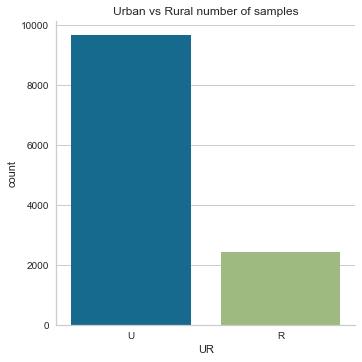

In [21]:
print("most of the samples were taken from Urban areas,")
print(f"number of urban samples is {sum(df['UR']=='U')}")
print(f"number of rural samples is {sum(df['UR']!='U')}")

sns.catplot(x = 'UR', kind='count', data = df).set(title='Urban vs Rural number of samples')

4A               2703
5A               2402
1A-2A            1740
3B-4B            1523
3A               1235
6A-6B             971
5B-5C             476
3C                368
4C                312
2B                209
7A-7B-7AK-8AK     144
Name: IECC_Climate_Pub, dtype: int64
Count of International Energy Conservation Code (IECC) climate zone (collapsed for public file)


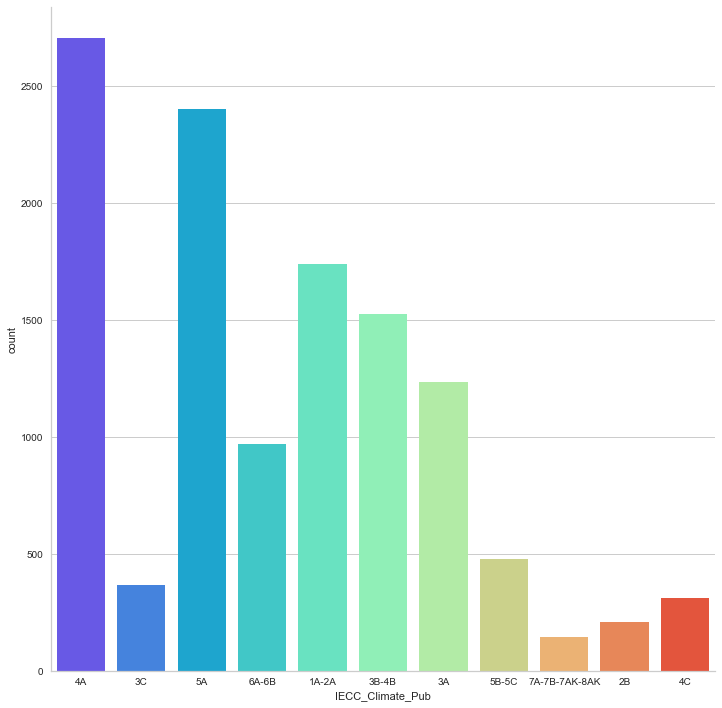

In [22]:
df['IECC_Climate_Pub'].unique()
print(df['IECC_Climate_Pub'].value_counts())
print("Count of International Energy Conservation Code (IECC) climate zone (collapsed for public file)")
sns.catplot(x='IECC_Climate_Pub', kind='count', palette='rainbow', data = df, height = 10)

note that the column 'NOCRCASH' and 'NKRGALNC' are categorical columns but have numerical values in them and are very similar. 

In [23]:
df['NOCRCASH'].value_counts()
df['NKRGALNC'].value_counts()

### dropping both columns, they have -2 as the majority of values 
df.drop(['NOCRCASH', 'NKRGALNC'], axis=1, inplace=True)

#### task 4: exploring some of the numerical columns and Correlation

In [24]:
### some columns have a very small variation of values in them

### list that contains column names with very low std
cols_low_var = []

for col in num_cols:
    if df[col].std() < 0.11:
        cols_low_var.append(col)
        
print("columns with std lower than < 0.1" , cols_low_var)

columns with std lower than < 0.1 ['USEEL', 'USESOLAR', 'ELOTHER', 'FOILAUX', 'FOOTHER', 'KRWARM', 'KEROAUX', 'KRWATER', 'KROTHER', 'WDWATER', 'SOLWARM', 'SOLARAUX', 'SOLWATER', 'SOLOTHER', 'OTHWARM', 'OTHERAUX', 'OTHWATER', 'OTHCOOK', 'ONSITE', 'KFUELOT', 'AGEHHMEMCAT12', 'AGEHHMEMCAT13', 'AGEHHMEMCAT14', 'WSF']


In [25]:
### exploring and plotting correlation for some of the numerical columns in the dataset
### for the sake of speeding things
### up and due to the lack of computational power i picked a small subset of cols to perform this step

few_num_cols = ['TYPEHUQ','DOLLAREL', 'WSF', 'BTUEL', 'KWHOTH', 'TVSIZE1', 'NUMH2ONOTNK', 'LGT1', 'KWH', 'AGECENAC', 'USENG']
df_num = main_df[few_num_cols]

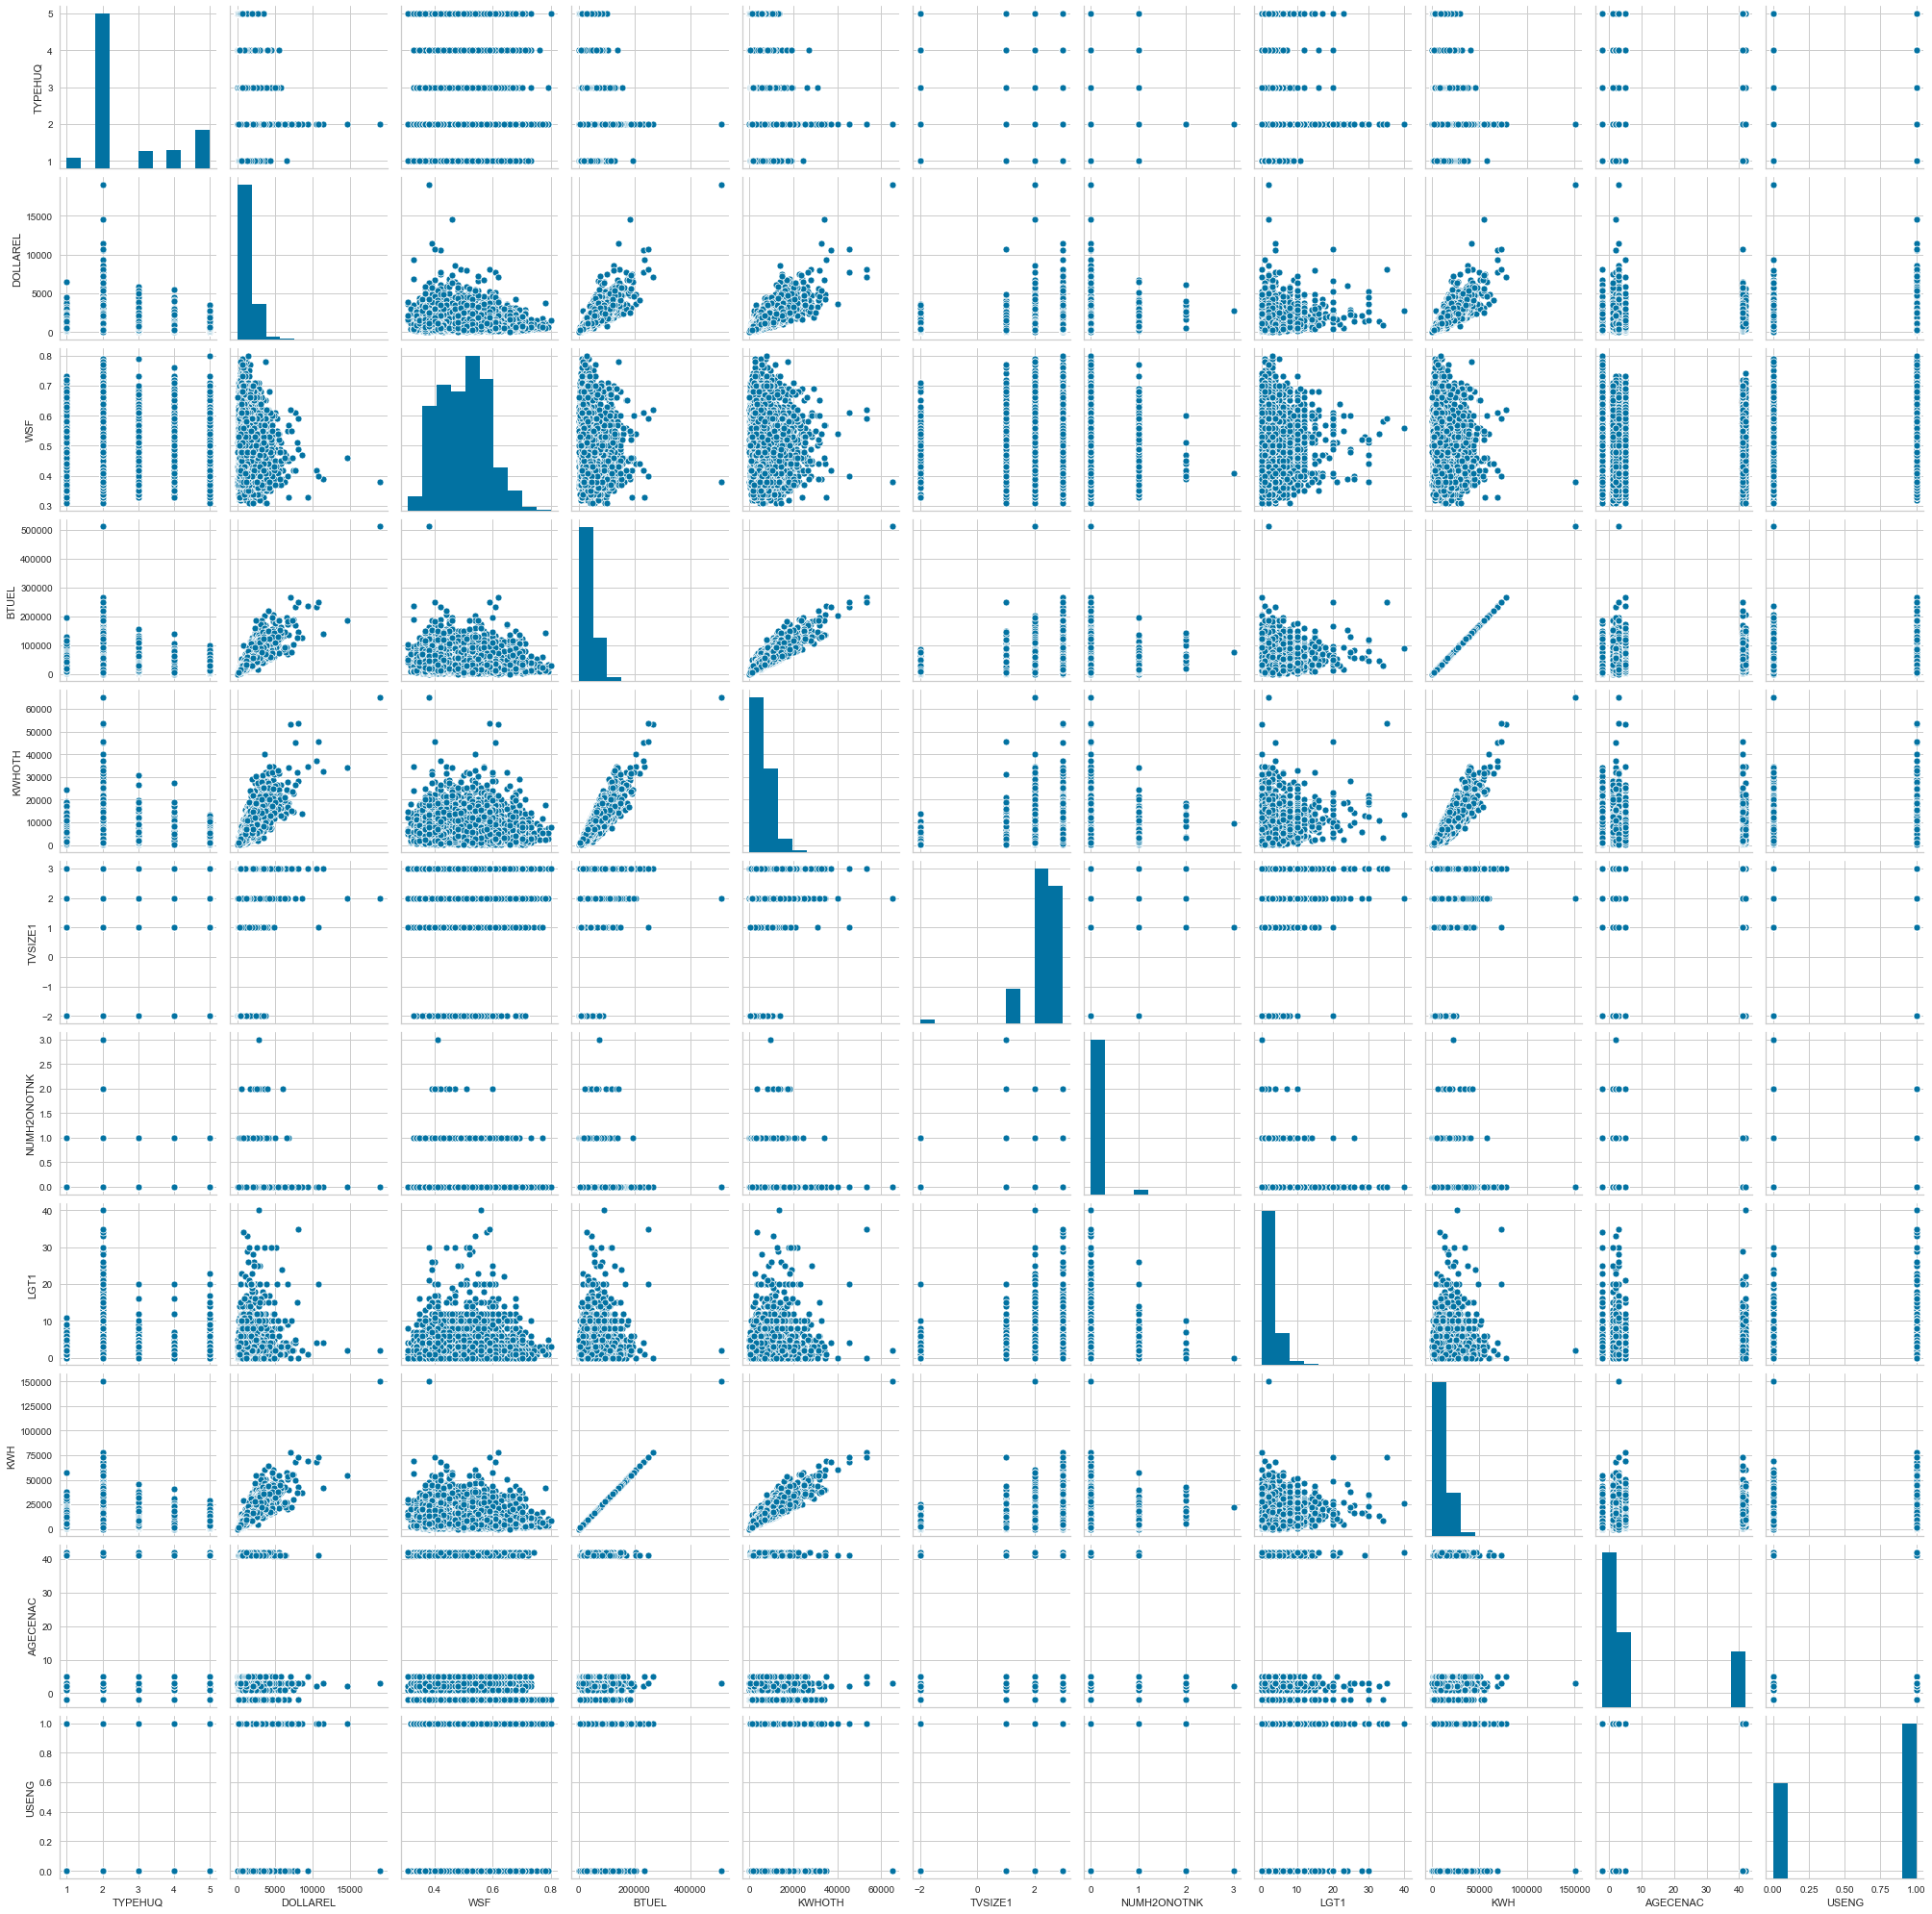

In [26]:
sns.pairplot(df_num, vars = tuple(few_num_cols))

"WSF" and "BTUEL" are essentially the same so when we use data to predict the consumption both columns will be dropped.

<AxesSubplot:xlabel='DOLLAREL', ylabel='KWH'>

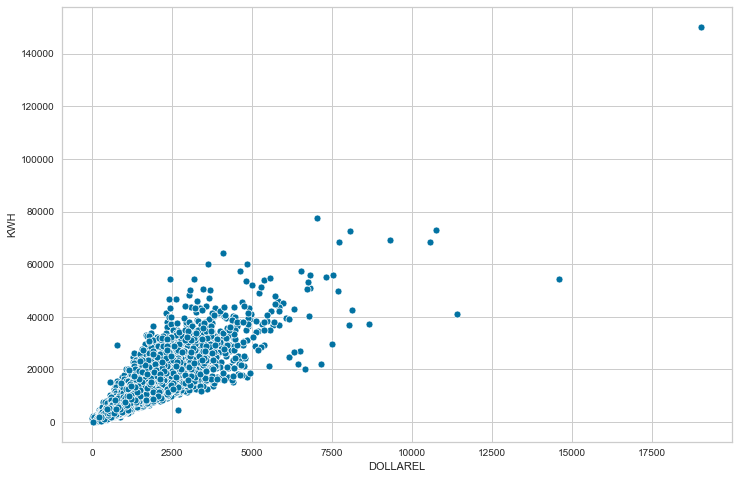

In [27]:
### correlation between KWH and DOLLAREL
### DOLLAREL: Total Electricity cost, in whole dollars, 2009
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x="DOLLAREL", y="KWH", data=df)

<AxesSubplot:xlabel='TOTSQFT_EN', ylabel='KWH'>

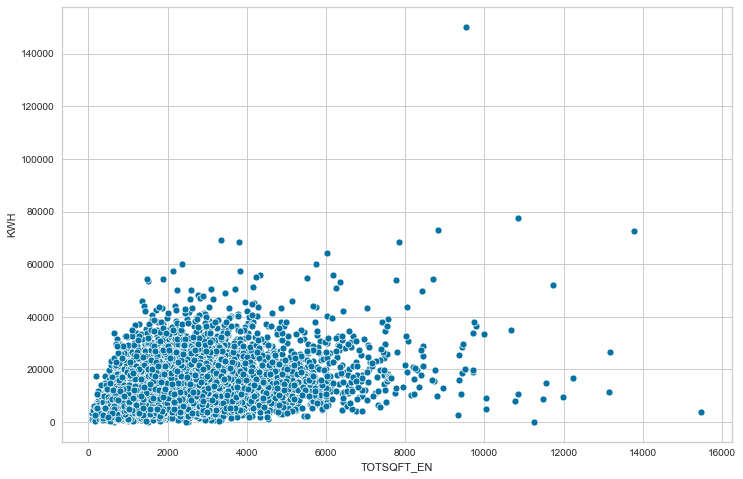

In [28]:
### correlation between KWH and TOTSQFT_EN
### TOTSQFT_EN : Total square footage (includes heated/cooled garages, all basements, and finished/heated/cooled attics).
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x="TOTSQFT_EN", y="KWH", data=df)

<AxesSubplot:xlabel='KWHOTH', ylabel='KWH'>

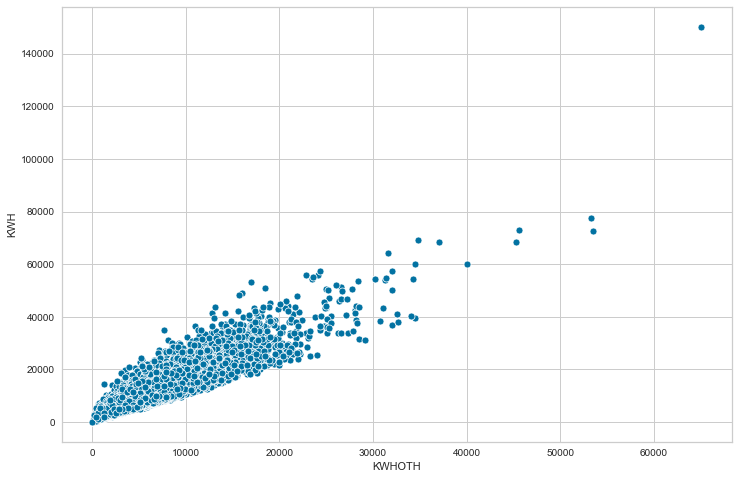

In [29]:
### correlation between KWH and EDUCATION
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x="KWHOTH", y="KWH", data=df)

<AxesSubplot:xlabel='KWHSPH', ylabel='KWH'>

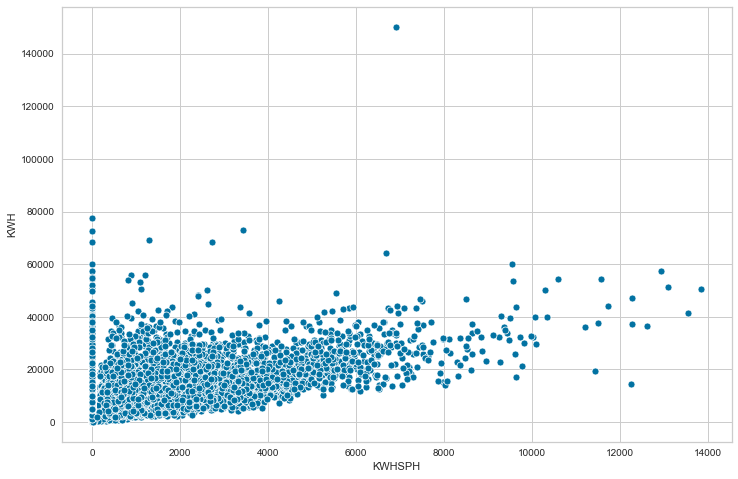

In [30]:
### correlation between KWH and KWHSPH
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x="KWHSPH", y="KWH", data=df)

<AxesSubplot:xlabel='EDUCATION', ylabel='KWH'>

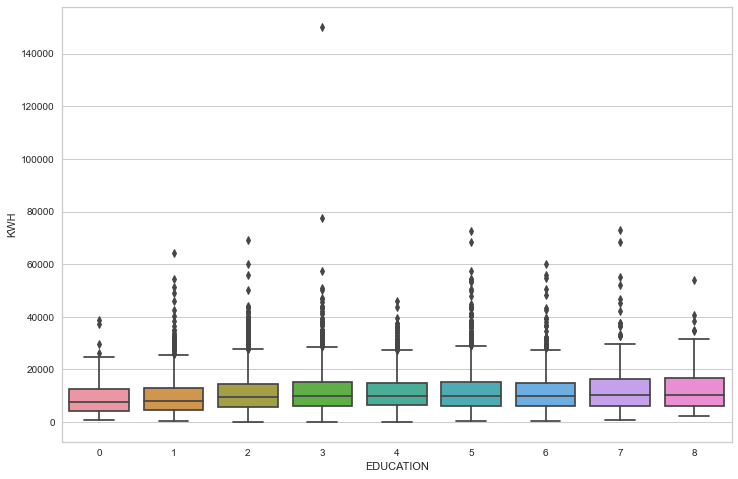

In [31]:
### boxplots between KWH and EDUCATION
### EDUCATION: Highest education completed by householder
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='EDUCATION', y='KWH', data=df)

<AxesSubplot:xlabel='TYPEHUQ', ylabel='KWH'>

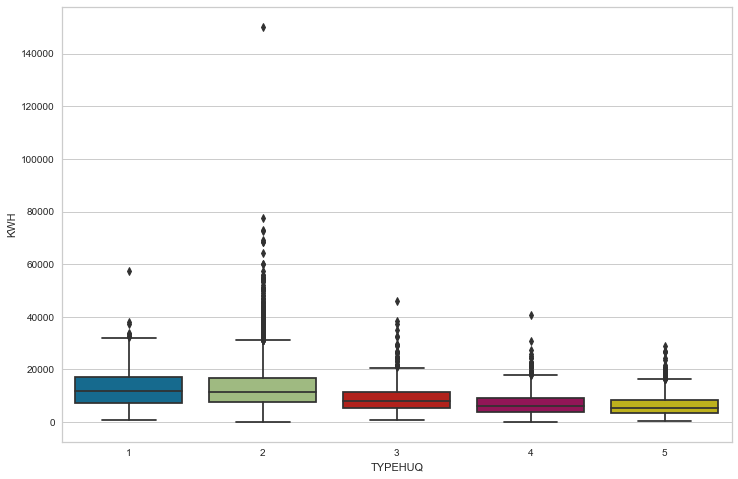

In [32]:
### correlation between KWH and TYPEHUQ
### TYPEHUQ: type of housing unit 
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='TYPEHUQ', y='KWH', data=df)

<AxesSubplot:>

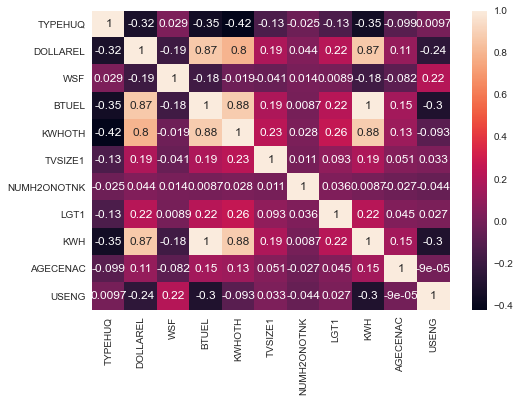

In [33]:
### heat map
### calculate the correlation and plot heatmap
corr = df_num.corr()
sns.heatmap(corr, 
        annot= True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

from the heatmap we can see that there's some correlation between the features but in general the data is not highly correlated

#### task 5: Clustering the data 

In [34]:
standard_data = StandardScaler().fit_transform(df_num)

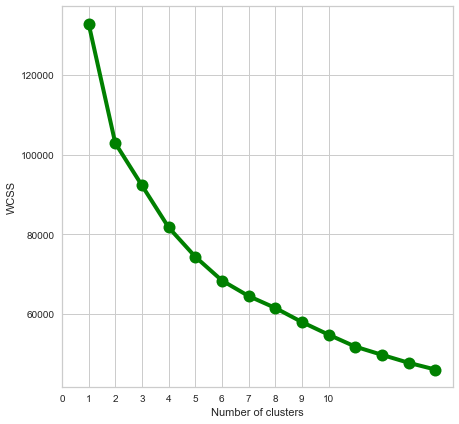

In [35]:
### we try to find the optimal numeber of clusters using the elbow method
WCSS = []
for i in range(1,15):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(standard_data)
    WCSS.append(model.inertia_)
    
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,15),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [36]:
### the purpose of clustering is to identify similar groups of points within the small subset of numerical columns we have


kmeans = KMeans(n_clusters=5, init='random')
kmeans.fit(standard_data)
pred = kmeans.fit_predict(standard_data)

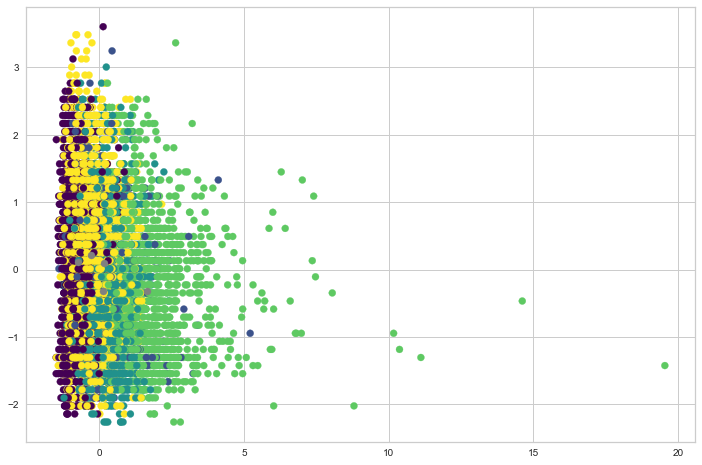

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(standard_data[:, 1], standard_data[:, 2], c=pred, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='grey', s=50)

we can see that the data does not cluster well at all

#### task 6: Feature Selection


after dropping the imputed columns and some of the categorical columns, we are left with fewer number of features

In [38]:
### splitting the data into training and testing sets
### create dummy variables
df = pd.get_dummies(df)

### dropping BTUEL columns
df.drop(['BTUEL'], axis=1, inplace = True)

In [39]:
### creating new numerical columns list after dropping low std ones
for i in cols_low_var:
    if i in num_cols:
        num_cols.remove(i)

try:        
    num_cols.remove('DOEID')
    num_cols.remove('KWH')
    num_cols.remove('BTUEL')
except ValueError:
    print('columns were dropped')

In [40]:
### the split of the dataset will be 80% training and 20% testing
split_ratio = int(len(df) * 0.8)

x_train = df[:split_ratio].drop(['KWH', 'DOEID'], axis=1)
y_train = df[:split_ratio]['KWH']
x_test = df[split_ratio:].drop(['KWH', 'DOEID'], axis=1)
y_test = df[split_ratio:]['KWH']

In [41]:
### Standardize features (normal distribution) using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
###fit transform on the training set
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])

###transform on the test set
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [42]:
### using XGBoost regressor to generate the rank of "feature importance"
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

important_features = pd.DataFrame(xgb.feature_importances_, columns = ['Importance'], index = x_train.columns)
important_features_shrunk = important_features.sort_values(['Importance'], ascending=False).head(20)

In [43]:
### we will take the top 100 features due to memory constrains
important_features_shrunk['column name'] = important_features_shrunk.index
x_train = x_train[important_features_shrunk['column name'].values]
x_test = x_test[important_features_shrunk['column name'].values]

In [44]:
important_features_shrunk

,Importance,column name
DOLLAREL,0.383865,DOLLAREL
KWHOTH,0.147758,KWHOTH
FUELHEAT,0.096881,FUELHEAT
FUELH2O,0.056298,FUELH2O
NCOMBATH,0.054007,NCOMBATH
KWHWTH,0.032569,KWHWTH
KWHCOL,0.028159,KWHCOL
BTUELOTH,0.026354,BTUELOTH
TOTALBTU,0.023339,TOTALBTU
KWHSPH,0.017292,KWHSPH


#### task 7: BUILDING THE MODELS

##### 1-Liner Regression

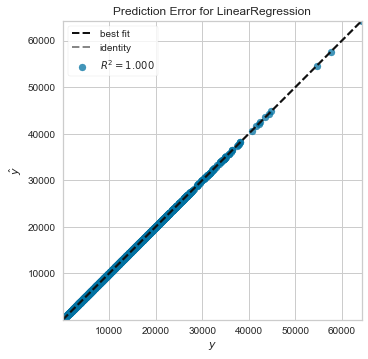

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

v1 = PredictionError(model)
v1.fit(x_train, y_train)
v1.score(x_test, y_test)
v1.show()

In [48]:
v1.score(x_test, y_test)

0.9999999999994486

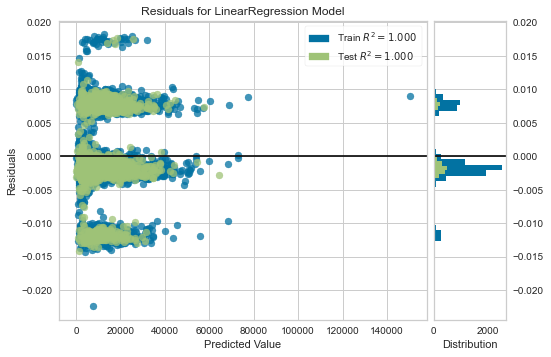

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [49]:
v2 = ResidualsPlot(model)
v2.fit(x_train, y_train)
v2.score(x_test, y_test)
v2.show()

In [50]:
model.predict(x_test)

array([6045.00281727, 6300.00762374, 5432.00835159, ..., 9833.99953307,
       4800.01136977, 1763.99674468])

we can see that Liner regression model has near perfect accuracy for both train and test sets

#### 2-random forest model

In [51]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=3, random_state=0,n_estimators=100)

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8274386123512665

In [52]:
estimator = model.estimators_[5]
estimator

DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=1537364731)

In [53]:
model.predict(x_test)

array([9403.15721388, 6307.06499871, 5000.86370015, ..., 9786.46964971,
       3432.70462884, 3432.70462884])

### Conclusion:

the reason i chose linear regression model as my top choice is based mainly on common sense, given that we have features that indicate the yearly cost if electricity, and sizes of houses, and the facet that those features are highly correlated with the target column indicates high predictive power.

notes on the linear regression model:
    1. if we only use the top 3 most important features
       train (r^2) = 0.88, and test (r^2) = 0.86 
    2. we reach score of almost 1.0 when we use top 20 most important features.


for comparison test purpose i used random forest model to predict the target column, with some minimal hyperparameters tuning it achieved score of 0.827, which is clearly much lower than the Liner regression model and it also runs slower.